In [32]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [33]:
from src.data_loader import load_glass, load_seeds
from src.common import create_base_classifier, get_score
from sklearn.datasets import load_wine
import pandas as pd
from sklearn.ensemble import RandomForestClassifier
import numpy as np
from tqdm import tqdm


seeds_df, seeds_target = load_seeds()

glass_df, glass_target = load_glass()

wine_df, wine_target = load_wine(as_frame=True, return_X_y=True)


In [34]:
nums_of_classifiers = np.arange(1, 100)

results_df = pd.DataFrame(
    columns=[
        "n_estimators",
        "score_seeds_mean",
        "score_seeds_std",
        "score_glass_mean",
        "score_glass_std",
        "score_wine_mean",
        "score_wine_std",
    ]
)

for num in tqdm(nums_of_classifiers):
    clf = RandomForestClassifier(
        n_estimators=num,
        random_state=42,
    )
    seeds_score = get_score(seeds_df, seeds_target.to_numpy().ravel(), clf)
    glass_score = get_score(glass_df, glass_target.to_numpy().ravel(), clf)
    wine_score = get_score(wine_df, wine_target.to_numpy().ravel(), clf)

    results_df.loc[len(results_df)] = [
        num,
        seeds_score.mean(),
        seeds_score.std(),
        glass_score.mean(),
        glass_score.std(),
        wine_score.mean(),
        wine_score.std(),
    ]

display(results_df.head(10))

max_features = np.arange(0.1, 1.1, 0.1)

results_max_features_df = pd.DataFrame(
    columns=[
        "max_features",
        "score_seeds_mean",
        "score_seeds_std",
        "score_glass_mean",
        "score_glass_std",
        "score_wine_mean",
        "score_wine_std",
    ]
)

for mf in tqdm(max_features):
    clf = RandomForestClassifier(random_state=42, max_features=mf)
    seeds_score = get_score(seeds_df, seeds_target.to_numpy().ravel(), clf)
    glass_score = get_score(glass_df, glass_target.to_numpy().ravel(), clf)
    wine_score = get_score(wine_df, wine_target.to_numpy().ravel(), clf)

    results_max_features_df.loc[len(results_max_features_df)] = [
        mf,
        seeds_score.mean(),
        seeds_score.std(),
        glass_score.mean(),
        glass_score.std(),
        wine_score.mean(),
        wine_score.std(),
    ]

display(results_max_features_df.head(10))

max_samples = np.arange(0.1, 1.1, 0.1)

results_max_samples_df = pd.DataFrame(
    columns=[
        "max_samples",
        "score_seeds_mean",
        "score_seeds_std",
        "score_glass_mean",
        "score_glass_std",
        "score_wine_mean",
        "score_wine_std",
    ]
)

for ms in tqdm(max_samples):
    clf = RandomForestClassifier(random_state=42, max_samples=ms)
    seeds_score = get_score(seeds_df, seeds_target.to_numpy().ravel(), clf)
    glass_score = get_score(glass_df, glass_target.to_numpy().ravel(), clf)
    wine_score = get_score(wine_df, wine_target.to_numpy().ravel(), clf)

    results_max_samples_df.loc[len(results_max_samples_df)] = [
        ms,
        seeds_score.mean(),
        seeds_score.std(),
        glass_score.mean(),
        glass_score.std(),
        wine_score.mean(),
        wine_score.std(),
    ]

display(results_max_samples_df.head(10))


100%|██████████| 99/99 [00:10<00:00,  9.49it/s]


,n_estimators,score_seeds_mean,score_seeds_std,score_glass_mean,score_glass_std,score_wine_mean,score_wine_std
0,1.0,0.873056,0.0,0.566130,0.0,0.915679,0.0
1,2.0,0.904762,0.0,0.655648,0.0,0.944269,0.0
2,3.0,0.900692,0.0,0.754269,0.0,0.972263,0.0
3,4.0,0.952137,0.0,0.682564,0.0,1.000000,0.0
4,5.0,0.927742,0.0,0.794090,0.0,0.972263,0.0
5,6.0,0.928480,0.0,0.794090,0.0,1.000000,0.0
6,7.0,0.927742,0.0,0.835446,0.0,1.000000,0.0
7,8.0,0.927742,0.0,0.813235,0.0,1.000000,0.0
8,9.0,0.900692,0.0,0.810134,0.0,1.000000,0.0
9,10.0,0.927742,0.0,0.810134,0.0,1.000000,0.0


100%|██████████| 10/10 [00:02<00:00,  4.72it/s]


,max_features,score_seeds_mean,score_seeds_std,score_glass_mean,score_glass_std,score_wine_mean,score_wine_std
0,0.1,0.873056,0.0,0.858583,0.0,1.0,0.0
1,0.2,0.873056,0.0,0.858583,0.0,1.0,0.0
2,0.3,0.900692,0.0,0.860848,0.0,1.0,0.0
3,0.4,0.900692,0.0,0.835527,0.0,1.0,0.0
4,0.5,0.927742,0.0,0.787199,0.0,1.0,0.0
5,0.6,0.900692,0.0,0.787199,0.0,1.0,0.0
6,0.7,0.900692,0.0,0.764499,0.0,1.0,0.0
7,0.8,0.900692,0.0,0.787199,0.0,1.0,0.0
8,0.9,0.900692,0.0,0.811869,0.0,1.0,0.0
9,1.0,0.900692,0.0,0.787199,0.0,1.0,0.0


100%|██████████| 10/10 [00:01<00:00,  5.11it/s]


,max_samples,score_seeds_mean,score_seeds_std,score_glass_mean,score_glass_std,score_wine_mean,score_wine_std
0,0.1,0.851409,0.0,0.646752,0.0,0.944444,0.0
1,0.2,0.851409,0.0,0.649912,0.0,0.972263,0.0
2,0.3,0.877395,0.0,0.761307,0.0,1.000000,0.0
3,0.4,0.900692,0.0,0.738095,0.0,1.000000,0.0
4,0.5,0.900692,0.0,0.783240,0.0,1.000000,0.0
5,0.6,0.900692,0.0,0.745936,0.0,1.000000,0.0
6,0.7,0.900692,0.0,0.791966,0.0,1.000000,0.0
7,0.8,0.900692,0.0,0.835527,0.0,1.000000,0.0
8,0.9,0.900692,0.0,0.810536,0.0,1.000000,0.0
9,1.0,0.900692,0.0,0.835527,0.0,1.000000,0.0


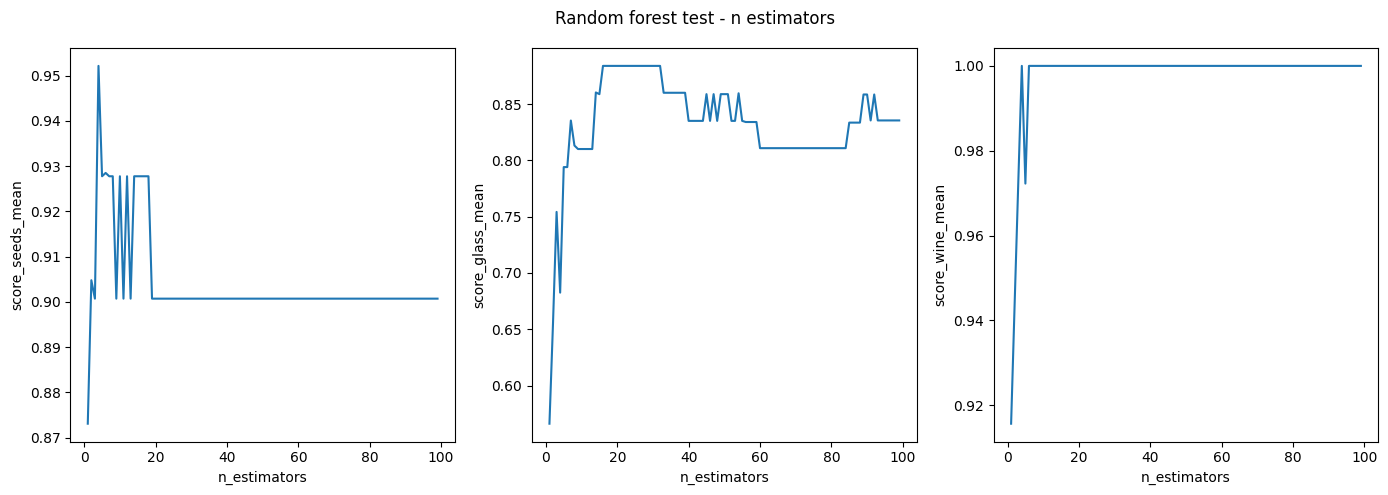

In [35]:
from src.common import plot_results

plot_results(
    results_df,
    "n_estimators",
    [
        "score_seeds_mean",
        "score_glass_mean",
        "score_wine_mean",
    ],
    "Random forest test - n estimators",
)


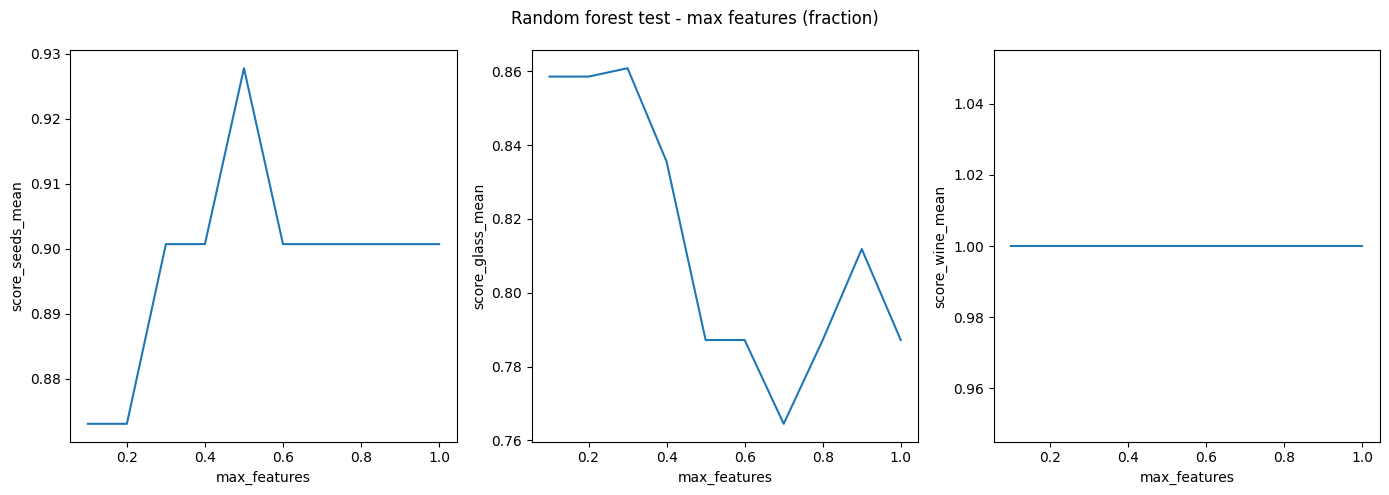

In [36]:
plot_results(
    results_max_features_df,
    "max_features",
    [
        "score_seeds_mean",
        "score_glass_mean",
        "score_wine_mean",
    ],
    "Random forest test - max features (fraction)",
)


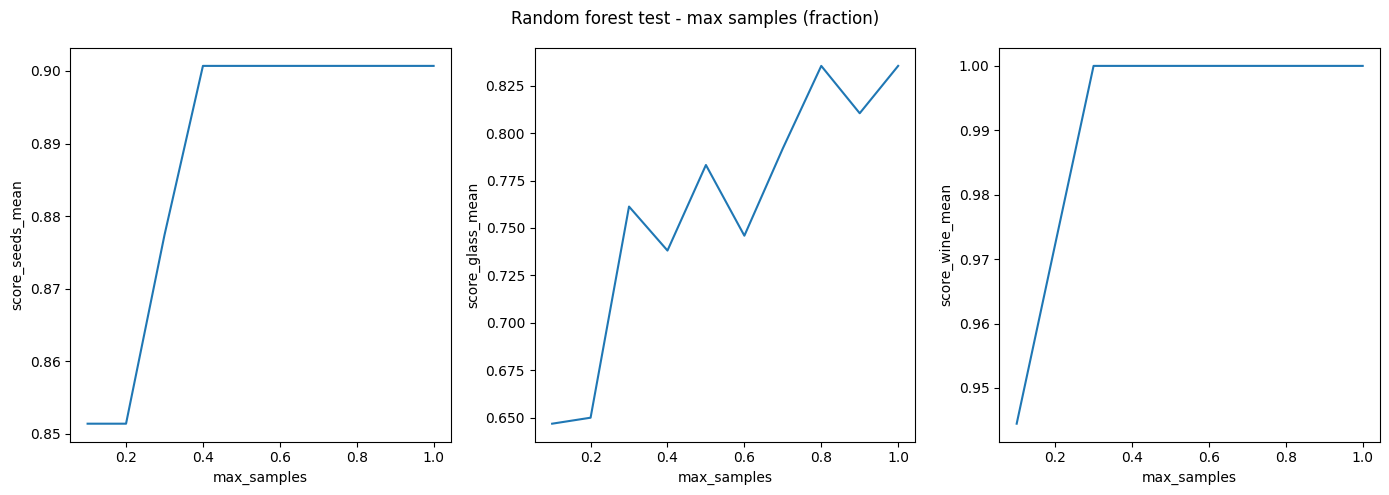

In [37]:
plot_results(
    results_max_samples_df,
    "max_samples",
    [
        "score_seeds_mean",
        "score_glass_mean",
        "score_wine_mean",
    ],
    "Random forest test - max samples (fraction)",
)


In [38]:
clf_seeds = RandomForestClassifier(
    random_state=42, max_samples=1.0, max_features=0.5, n_estimators=4
)

clf_glass = RandomForestClassifier(
    random_state=42, max_samples=1.0, max_features=0.3, n_estimators=20
)

clf_wine = RandomForestClassifier(
    random_state=42, max_samples=1.0, max_features=0.5, n_estimators=100
)

score = get_score(
    seeds_df, seeds_target.to_numpy().ravel(), cross_val=True, clf=clf_seeds
)
print(f"Cross val score on seeds: mean = {score.mean()}, std = {score.std()}")

score = get_score(
    glass_df, glass_target.to_numpy().ravel(), cross_val=True, clf=clf_glass
)
print(f"Cross val score on glass: mean = {score.mean()}, std = {score.std()}")

score = get_score(wine_df, wine_target.to_numpy().ravel(), cross_val=True, clf=clf_wine)
print(f"Cross val score on wine: mean = {score.mean()}, std = {score.std()}")


Cross val score on seeds: mean = 0.8952380952380953, std = 0.05553287518900288
Cross val score on glass: mean = 0.7710963455149502, std = 0.03959486223372645
Cross val score on wine: mean = 0.9774603174603176, std = 0.021299434518521104
